In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##data generation
import numpy as np
import scipy.io
# import math
# import threading
# from tensorflow.keras.utils import Sequence
walshsize=16
##############################################training data set

g = scipy.io.loadmat('/content/drive/MyDrive/Walsh_fluo_noise_training_20221102_wrap_atan_atan2_minus_16pixel_2P.mat')

# y_val = np.array(g['coeff']) # hypercube cell
y_val2 = np.array(g['new_label'])# Voronoi cell
x_val = np.array(g['fluoint']) # intensity reading
z_val = np.array(g['std_cal']) # rough estiamtes of coeffs


nobiasint_val = np.expand_dims(np.repeat(np.expand_dims(x_val[:,0],axis=1),walshsize-1,axis = 1),axis=2)


nobiasint2_val = np.repeat(np.expand_dims(np.expand_dims(x_val[:,0],axis=1),axis=1),3,axis = 2)


biasint_val = x_val[:,1::].reshape(-1,walshsize-1,2)



reconstructedfluoint_val = np.expand_dims(np.append(np.append(nobiasint_val,biasint_val,axis=2),nobiasint2_val,axis = 1),axis=-1)
print(reconstructedfluoint_val.shape)  
print(y_val2.shape)
print(z_val.shape)


# # ##############################################validation data set
f = scipy.io.loadmat('/content/drive/MyDrive/Walsh_fluo_noise_validation_20221102_wrap_atan_atan2_minus_16pixel_2P.mat')
# y_val_validation = np.array(f['coeff']) # hypercube cell
y_val2_validation = np.array(f['new_label'])# Voronoi cell
x_val_validation = np.array(f['fluoint']) # intensity reading
z_val_validation = np.array(f['std_cal']) # rough estiamtes of coeffs


nobiasint_val_validation = np.expand_dims(np.repeat(np.expand_dims(x_val_validation[:,0],axis=1),walshsize-1,axis = 1),axis=2)


nobiasint2_val_validation = np.repeat(np.expand_dims(np.expand_dims(x_val_validation[:,0],axis=1),axis=1),3,axis = 2)


biasint_val_validation = x_val_validation[:,1::].reshape(-1,walshsize-1,2)




reconstructedfluoint_val_validation = np.expand_dims(np.append(np.append(nobiasint_val_validation,biasint_val_validation,axis=2),nobiasint2_val_validation,axis = 1),axis=-1)

print(reconstructedfluoint_val_validation.shape)  
print(y_val2_validation.shape)
print(z_val_validation.shape)

(8388608, 16, 3, 1)
(8388608, 15)
(8388608, 15)
(1024, 16, 3, 1)
(1024, 15)
(1024, 15)


In [ ]:
# ## NN structure
    
# from tensorflow.keras import datasets, layers, models


# ########################################inputs for whole neural network
# inputs = tf.keras.Input(shape=(reconstructedfluoint_val.shape[1],reconstructedfluoint_val.shape[2],reconstructedfluoint_val.shape[3]))
# inputs2 = tf.keras.Input(shape=(z_val.shape[1]))

# # # the first branch operates on the first input
# # x = Dense(8, activation="relu")(inputA)
# # x = Dense(4, activation="relu")(x)
# # x = Model(inputs=inputA, outputs=x)
# # # the second branch opreates on the second input
# # y = Dense(64, activation="relu")(inputB)
# # y = Dense(32, activation="relu")(y)
# # y = Dense(4, activation="relu")(y)
# # y = Model(inputs=inputB, outputs=y)
# # # combine the output of the two branches
# # combined = concatenate([x.output, y.output])
# # # apply a FC layer and then a regression prediction on the
# # # combined outputs
# # z = Dense(2, activation="relu")(combined)
# # z = Dense(1, activation="linear")(z)
# # # our model will accept the inputs of the two branches and
# # # then output a single value
# # model = Model(inputs=[x.input, y.input], outputs=z)
# x = layers.Conv2D(32, (1, 3), strides=(1, 1),padding="valid",activation='tanh',kernel_initializer=tf.keras.initializers.GlorotUniform())(inputs)

# # x1 = layers.Conv2D(32, (2, 1), strides=(1, 1),padding="same",activation='tanh',kernel_initializer=tf.keras.initializers.GlorotUniform)(inputs)
# # x1 = layers.MaxPool2D(pool_size=(2, 1))(x1)
# # x1 = layers.Conv2D(64, (2, 1), strides=(1, 1),padding="same",activation='tanh',kernel_initializer=tf.keras.initializers.GlorotUniform)(x1)
# # x1 = layers.MaxPool2D(pool_size=(2, 1))(x1)
# # x1 = layers.Conv2D(128, (2, 1), strides=(1, 1),padding="same",activation='tanh',kernel_initializer=tf.keras.initializers.GlorotUniform)(x1)
# # x1 = layers.MaxPool2D(pool_size=(2, 1))(x1)
# # x1 = layers.Conv2D(256, (2, 1), strides=(1, 1),padding="same",activation='tanh',kernel_initializer=tf.keras.initializers.GlorotUniform)(x1)
# # x1 = layers.MaxPool2D(pool_size=(2, 3))(x1)

# x = layers.Conv2D(64, (2, 1), strides=(1, 1),padding="same",activation='tanh',kernel_initializer=tf.keras.initializers.GlorotUniform())(x)
# x = layers.MaxPool2D(pool_size=(2, 1))(x)
# x = layers.Conv2D(128, (2, 1), strides=(1, 1),padding="same",activation='tanh',kernel_initializer=tf.keras.initializers.GlorotUniform())(x)
# x = layers.MaxPool2D(pool_size=(2, 1))(x)
# x = layers.Conv2D(256, (2, 1), strides=(1, 1),padding="same",activation='tanh',kernel_initializer=tf.keras.initializers.GlorotUniform())(x)
# x = layers.MaxPool2D(pool_size=(2, 1))(x)
# x = layers.Conv2D(512, (2, 1), strides=(1, 1),padding="same",activation='tanh',kernel_initializer=tf.keras.initializers.GlorotUniform)(x)
# x = layers.MaxPool2D(pool_size=(2, 1))(x)
# # x = layers.Concatenate()([x1,x])


# x = layers.Flatten()(x)
# #x = layers.Dense(512, activation='tanh',kernel_initializer=tf.keras.initializers.GlorotUniform())(x)

# # x = layers.Dense(64, activation='tanh',kernel_initializer=tf.keras.initializers.GlorotUniform)(x)
# #x_output = tf.keras.layers.Dense(y_val2.shape[1], activation=tf.keras.activations.linear)(x)
# x_output = tf.keras.layers.Dense(1024, activation=tf.keras.activations.linear)(x)
# # x = tf.keras.Model(inputs=inputs, outputs=x_output)

# z = layers.Concatenate()([x_output,inputs2])
# #z = layers.Dense(512, activation='tanh',kernel_initializer=tf.keras.initializers.GlorotUniform())(z)
# z = layers.Dense(512, activation='tanh',kernel_initializer=tf.keras.initializers.GlorotUniform())(z)
# z = layers.Dense(256, activation='tanh',kernel_initializer=tf.keras.initializers.GlorotUniform())(z)
# z = layers.Dense(128, activation='tanh',kernel_initializer=tf.keras.initializers.GlorotUniform())(z)
# z_output = tf.keras.layers.Dense(y_val2.shape[1], activation=tf.keras.activations.linear)(z)


# model = tf.keras.Model(inputs=[inputs, inputs2], outputs=z_output)



# # model = models.Sequential()
# # model.add(layers.Conv2D(64, (1, 3), strides=(1, 1),padding="valid",activation='relu',kernel_initializer=tf.keras.initializers.GlorotUniform, input_shape=(15,3,1)))

# # model.add(layers.Conv2D(128, (15, 1), strides=(1, 1),padding="valid",activation='relu',kernel_initializer=tf.keras.initializers.GlorotUniform ))
# # model.add(layers.Flatten())
# # model.add(layers.Dense(64, activation='relu',kernel_initializer=tf.keras.initializers.GlorotUniform ))
# # model.add(layers.Dense(32, activation='relu',kernel_initializer=tf.keras.initializers.GlorotUniform ))
# # # model.add(layers.Dense(16, activation='relu',kernel_initializer=tf.keras.initializers.GlorotUniform ))

# # model.add(layers.Dense(new_label.shape[1],activation=tf.keras.activations.linear))

# # print(reconstructedfluoint.shape,reconstructedfluoint_val.shape,coeff.shape,new_label.shape)

In [ ]:
# print(model.summary())

In [3]:
model=tf.keras.models.load_model("/content/drive/MyDrive/20221104_2P_noise_model_16pixel_wrappedz.h5")

In [ ]:
# #############################customize loss function
# ##data generation
# ###1D walsh
# from scipy.linalg import hadamard
# from sympy.combinatorics import GrayCode
# import numpy as np
# import math

# #####generate 1d Walsh
# def walsh(N):
#   H=hadamard(N)
 
#   ##re-order
#   graycode=GrayCode(N/2)
  
#   graycode=list(graycode.generate_gray())

#   graycode=np.expand_dims(graycode,axis=1)
 
#   j=0
#   graycode_new=np.zeros(N,dtype=int)
  
#   for i in range(graycode.shape[0]):
#     if int((graycode[i])[0][::-1],2)<N:
#       graycode_new[j]=int((graycode[i])[0][::-1],2)
#       j=j+1

#   H_new=np.zeros([N,N],dtype=int)

#   for i in range(H.shape[0]):
#      H_new[i]=H[int(graycode_new[i])]
#   return H_new
# ##########################
# walshsize=16
# Walsh1D=walsh(walshsize)

# ###############################
# def custom_loss(y_true,y_pred):
#   abb=np.zeros(walshsize)
#   y=y_true-y_pred
#   for i in range(1,walshsize):
#     abb=abb+Walsh1D[i]*y[0][i-1]
  
  
#   SR=np.abs(np.sum(np.exp((abb)))/walshsize)**2
#   custom_loss=(1-SR)
#   return custom_loss
 


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=tf.keras.losses.MeanSquaredError())
history=model.fit(x=[reconstructedfluoint_val,z_val],y=y_val2,epochs=10,shuffle=True,steps_per_epoch=2048,verbose=2,validation_data=([reconstructedfluoint_val_validation,z_val_validation],y_val2_validation))

from google.colab import files
import csv
with open('/content/drive/MyDrive/20221104_2P_noise_model_16pixel_wrappedz.csv','a+') as f:
  writer=csv.writer(f)
  writer.writerow(np.squeeze(history.history['loss']))
  writer.writerow(np.squeeze(history.history['val_loss']))

model_name='/content/drive/MyDrive/20221104_2P_noise_model_16pixel_wrappedz.h5'
model.save(model_name)
print('Model saved')


NameError: ignored

<function matplotlib.pyplot.legend(*args, **kwargs)>

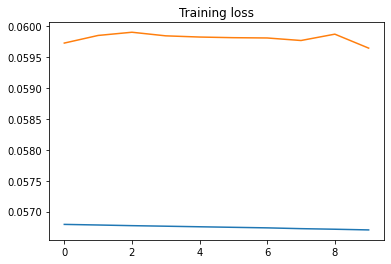

In [ ]:
epochs=range(len(history.history['loss']))
plt.figure()
plt.plot(epochs,history.history['loss'],label='Training loss')
plt.plot(epochs,history.history['val_loss'])
plt.title('Training loss')
plt.legend
# plt.ylim((0,0.2))
# fig_name='./Loss_fig_20220707_1e-4_16batch'
# plt.savefig(fig_name)
# from google.colab import files
# files.download('Loss_fig_20220627_0to200epoch.png')

In [12]:
###data generation
###1D walsh
from scipy.linalg import hadamard
from sympy.combinatorics import GrayCode
import numpy as np
import math

#####generate 1d Walsh
def walsh(N):
  H=hadamard(N)
 
  ##re-order
  graycode=GrayCode(N/2)
  
  graycode=list(graycode.generate_gray())

  graycode=np.expand_dims(graycode,axis=1)
 
  j=0
  graycode_new=np.zeros(N,dtype=int)
  
  for i in range(graycode.shape[0]):
    if int((graycode[i])[0][::-1],2)<N:
      graycode_new[j]=int((graycode[i])[0][::-1],2)
      j=j+1

  H_new=np.zeros([N,N],dtype=int)

  for i in range(H.shape[0]):
     H_new[i]=H[int(graycode_new[i])]
  return H_new
###########################################################set sample number
validation_size=2**10
walshsize=16
Walsh1D=walsh(walshsize)
########validation dataset generation
y_val_validation=((np.random.rand(validation_size,walshsize-1))-0.5)*np.pi # hypercube cell coefficients
y_val_validation_conventional=((np.random.rand(validation_size,walshsize-1))-0.5)*np.pi # hypercube cell coefficients
y_val_validation_conventional_sequential=((np.random.rand(validation_size,walshsize-1))-0.5)*np.pi # hypercube cell coefficients
y_val2_validation = np.zeros([validation_size,walshsize-1])# Voronoi cell labels
x_val_validation = np.zeros([validation_size,walshsize*2-1]) # intensity reading
z_val_validation = np.zeros([validation_size,walshsize-1]) # rough estiamtes of coeffs
z_val2_validation = np.zeros([validation_size,walshsize-1]) # wrapped rough estiamtes of coeffs
SR=np.zeros([validation_size,1])
SR_sequential=np.zeros([validation_size,1])
SR_NN=np.zeros([validation_size,1])

#################################################################sinusoidal fitting 
for n in range(11):
  
   if n==0:
       aberration=y_val_validation_conventional
       for counti in range (validation_size):
         abb=np.zeros(walshsize)
         for i in range(1,walshsize):
           abb=abb+Walsh1D[i]*aberration[counti][i-1]
         pupilfield=np.exp(abb*1j)
         SR[counti]=np.abs(np.sum(pupilfield)/walshsize)**2## calculate original Strehl ratio
       print('traditional validation original',round(np.average(SR),4))
   for counti in range (validation_size):
     abb=np.zeros(walshsize)
     for i in range(1,walshsize):
       abb=abb+Walsh1D[i]*aberration[counti][i-1]
    
     x_val_validation[counti][0]=np.abs(np.sum(np.exp(abb*1j))/walshsize)**4## non-biased intensity
     for i in range(1,walshsize):
       x_val_validation[counti][2*i-1]=np.abs(np.sum(np.exp((abb+Walsh1D[i]*(np.pi/3))*1j))/walshsize)**4  ###+biased intensity reading
       x_val_validation[counti][2*i]=np.abs(np.sum(np.exp((abb-Walsh1D[i]*(np.pi/3))*1j))/walshsize)**4  ###-biased intensity reading
     #add noise
     lambdalambda=np.random.uniform(10,1e4)
     x_val_validation[counti][:]=np.random.poisson(np.round(x_val_validation[counti][:]*lambdalambda))/lambdalambda
     for i in range(1,walshsize):
       z_val_validation[counti][i-1]=0.5*np.arctan2((math.sqrt(x_val_validation[counti][2*i-1])-math.sqrt(x_val_validation[counti][2*i]))*(-math.sqrt(3)),(-math.sqrt(x_val_validation[counti][2*i-1])-math.sqrt(x_val_validation[counti][2*i])+2*math.sqrt(x_val_validation[counti][0])))
    
     if n==0:
       aberrationnew=aberration[counti]-z_val_validation[counti]
       abb=np.zeros(walshsize)
       for i in range(1,walshsize):
         abb=abb+Walsh1D[i]*aberrationnew[i-1]
       pupilfield=np.exp(abb*1j)
       aberration[counti]=aberrationnew
      
     else:
       aberrationnew=aberration[counti]-z_val_validation[counti]
       abb=np.zeros(walshsize)
       for i in range(1,walshsize):
         abb=abb+Walsh1D[i]*aberrationnew[i-1]
       pupilfield=np.exp(abb*1j)
       aberration[counti]=aberrationnew
       
     SR[counti]=np.abs(np.sum(pupilfield)/walshsize)**2## calculate original Strehl ratio

   print('traditional validation',n+1,round(np.average(SR),4))
   n=n+1;
#################################################################sinusoidal fitting sequential applications
for n in range(11):
  
   if n==0:
       aberration=y_val_validation_conventional_sequential
       for counti in range (validation_size):
         abb=np.zeros(walshsize)
         for i in range(1,walshsize):
           abb=abb+Walsh1D[i]*aberration[counti][i-1]
         pupilfield=np.exp(abb*1j)
         SR_sequential[counti]=np.abs(np.sum(pupilfield)/walshsize)**2## calculate original Strehl ratio
       print('traditional validation original sequential',round(np.average(SR_sequential),4))
   for counti in range (validation_size):
     abb=np.zeros(walshsize)
     for i in range(1,walshsize):
       abb=abb+Walsh1D[i]*aberration[counti][i-1]
    
     
     for i in range(1,walshsize):
       x_val_validation[counti][0]=np.abs(np.sum(np.exp(abb*1j))/walshsize)**4## non-biased intensity
       #add noise
       lambdalambda=np.random.uniform(10,1e4)
       x_val_validation[counti][0]=np.random.poisson(np.round(x_val_validation[counti][0]*lambdalambda))/lambdalambda
       x_val_validation[counti][2*i-1]=np.abs(np.sum(np.exp((abb+Walsh1D[i]*(np.pi/3))*1j))/walshsize)**4  ###+biased intensity reading
       x_val_validation[counti][2*i]=np.abs(np.sum(np.exp((abb-Walsh1D[i]*(np.pi/3))*1j))/walshsize)**4  ###-biased intensity reading
       #add noise
       lambdalambda=np.random.uniform(10,1e4)
       x_val_validation[counti][2*i-1:2*i+1]=np.random.poisson(np.round(x_val_validation[counti][2*i-1:2*i+1]*lambdalambda))/lambdalambda
      
       z_val_validation[counti][i-1]=0.5*np.arctan2((math.sqrt(x_val_validation[counti][2*i-1])-math.sqrt(x_val_validation[counti][2*i]))*(-math.sqrt(3)),(-math.sqrt(x_val_validation[counti][2*i-1])-math.sqrt(x_val_validation[counti][2*i])+2*math.sqrt(x_val_validation[counti][0])))  
       
       aberration_prediction=np.zeros([1,walshsize-1])
      #  print(aberration_prediction)
       aberration_prediction[0][i-1]=z_val_validation[counti][i-1]
      #  print(aberration_prediction)
      #  print(z_val_validation[counti][i-1])
       aberrationnew=aberration[counti]-aberration_prediction[0]
      #  print(aberration[counti])
      #  print(aberration_prediction[0])
      #  print(aberrationnew)
       aberration[counti]=aberrationnew
      #  print(aberration[counti])
      #  print(aberration[counti])
      #  print(aberration_prediction[0])
      #  print(aberrationnew)
       abb=np.zeros(walshsize)
       for i in range(1,walshsize):
        
         abb=abb+Walsh1D[i]*aberrationnew[i-1]
        
       
       
     pupilfield=np.exp(abb*1j)
     
     SR_sequential[counti]=np.abs(np.sum(pupilfield)/walshsize)**2## calculate original Strehl ratio

   print('traditional validation sequential',n+1,round(np.average(SR_sequential),4))
   n=n+1;
####################################################################NN correction
for counti in range (validation_size):
  abb=np.zeros(walshsize)
  for i in range(1,walshsize):
    abb=abb+Walsh1D[i]*y_val_validation[counti][i-1]
  
  pupilfield=np.exp(abb*1j)
  SR_NN[counti]=np.abs(np.sum(pupilfield)/walshsize)**2## calculate original Strehl ratio
  new_abb=abb-np.angle(np.sum(pupilfield)/walshsize)#remove phasor
  new_abb=np.angle(np.exp(new_abb*1j))# phase wrap
  for i in range(1,walshsize):
    y_val2_validation[counti][i-1]=np.sum(new_abb*Walsh1D[i])/np.sum(Walsh1D[i]*Walsh1D[i])##walsh mode decompose
  
  x_val_validation[counti][0]=np.abs(np.sum(np.exp(new_abb*1j))/walshsize)**4## non-biased intensity
  for i in range(1,walshsize):
    x_val_validation[counti][2*i-1]=np.abs(np.sum(np.exp((new_abb+Walsh1D[i]*(np.pi/3))*1j))/walshsize)**4  ###+biased intensity reading
    x_val_validation[counti][2*i]=np.abs(np.sum(np.exp((new_abb-Walsh1D[i]*(np.pi/3))*1j))/walshsize)**4  ###-biased intensity reading
  #add noise
  lambdalambda=np.random.uniform(10,1e4)
  x_val_validation[counti][:]=np.random.poisson(np.round(x_val_validation[counti][:]*lambdalambda))/lambdalambda
  for i in range(1,walshsize):
    z_val_validation[counti][i-1]=0.5*np.arctan2(-(math.sqrt(3))*(math.sqrt(x_val_validation[counti][2*i-1])-math.sqrt(x_val_validation[counti][2*i])),(-math.sqrt(x_val_validation[counti][2*i-1])-math.sqrt(x_val_validation[counti][2*i])+2*math.sqrt(x_val_validation[counti][0])))
  ###wrap z into std_cal
  abb=np.zeros(walshsize)
  for i in range(1,walshsize):
    abb=abb+Walsh1D[i]*z_val_validation[counti][i-1]
  
    pupilfield=np.exp(abb*1j)
 
    new_abb=abb-np.angle(np.sum(pupilfield)/walshsize)#remove phasor
    new_abb=np.angle(np.exp(new_abb*1j))# phase wrap
  for i in range(1,walshsize):
    z_val2_validation[counti][i-1]=np.sum(new_abb*Walsh1D[i])/np.sum(Walsh1D[i]*Walsh1D[i])##walsh mode decompose 
#validation data set
nobiasint_val_validation = np.expand_dims(np.repeat(np.expand_dims(x_val_validation[:,0],axis=1),walshsize-1,axis = 1),axis=2)

nobiasint2_val_validation = np.repeat(np.expand_dims(np.expand_dims(x_val_validation[:,0],axis=1),axis=1),3,axis = 2)

biasint_val_validation = x_val_validation[:,1::].reshape(-1,walshsize-1,2)

reconstructedfluoint_val_validation = np.expand_dims(np.append(np.append(nobiasint_val_validation,biasint_val_validation,axis=2),nobiasint2_val_validation,axis = 1),axis=-1)

# print(nobiasint_val_validation.shape,nobiasint2_val_validation.shape,biasint_val_validation.shape,reconstructedfluoint_val_validation.shape)  



############################################################################# do predictions
pred_test = model.predict([reconstructedfluoint_val_validation,z_val2_validation])
#########################################################################calculate SR


###calculate original Strehl ratio
print('original SR',round(np.average(SR_NN),4))

#######################################################
aberration=pred_test-y_val2_validation;
for counti in range (validation_size):
  abb=np.zeros(walshsize)
  for i in range(1,walshsize):
    abb=abb+Walsh1D[i]*aberration[counti][i-1]
  
  pupilfield=np.exp(abb*1j)
  SR_NN[counti]=np.abs(np.sum(pupilfield)/walshsize)**2## calculate original Strehl ratio
print('NN validation 1st',round(np.average(SR_NN),4))
#####################################################################################
########################################################### validation 2nd round
###loop
for I in range (10): 
   y_val_validation=y_val2_validation-pred_test
###############################
   y_val2_validation = np.zeros([validation_size,walshsize-1])# Voronoi cell labels
   x_val_validation = np.zeros([validation_size,walshsize*2-1]) # intensity reading
   z_val_validation = np.zeros([validation_size,walshsize-1]) # rough estiamtes of coeffs
   z_val2_validation = np.zeros([validation_size,walshsize-1]) # wrapped rough estiamtes of coeffs
#######################################
   for counti in range (validation_size):
     abb=np.zeros(walshsize)
     for i in range(1,walshsize):
       abb=abb+Walsh1D[i]*y_val_validation[counti][i-1]
  
     pupilfield=np.exp(abb*1j)
 
     new_abb=abb-np.angle(np.sum(pupilfield)/walshsize)#remove phasor
     new_abb=np.angle(np.exp(new_abb*1j))# phase wrap
     for i in range(1,walshsize):
       y_val2_validation[counti][i-1]=np.sum(new_abb*Walsh1D[i])/np.sum(Walsh1D[i]*Walsh1D[i])##walsh mode decompose
  
     x_val_validation[counti][0]=np.abs(np.sum(np.exp(new_abb*1j))/walshsize)**4## non-biased intensity
     for i in range(1,walshsize):
       x_val_validation[counti][2*i-1]=np.abs(np.sum(np.exp((new_abb+Walsh1D[i]*(np.pi/3))*1j))/walshsize)**4  ###+biased intensity reading
       x_val_validation[counti][2*i]=np.abs(np.sum(np.exp((new_abb-Walsh1D[i]*(np.pi/3))*1j))/walshsize)**4  ###-biased intensity reading
     #add noise
     lambdalambda=np.random.uniform(10,1e4)
     x_val_validation[counti][:]=np.random.poisson(np.round(x_val_validation[counti][:]*lambdalambda))/lambdalambda
     for i in range(1,walshsize):
       z_val_validation[counti][i-1]=0.5*np.arctan2((-math.sqrt(3))*(math.sqrt(x_val_validation[counti][2*i-1])-math.sqrt(x_val_validation[counti][2*i])),(-math.sqrt(x_val_validation[counti][2*i-1])-math.sqrt(x_val_validation[counti][2*i])+2*math.sqrt(x_val_validation[counti][0])))
     ###wrap z into std_cal
     abb=np.zeros(walshsize)
     for i in range(1,walshsize):
       abb=abb+Walsh1D[i]*z_val_validation[counti][i-1]
  
       pupilfield=np.exp(abb*1j)
 
       new_abb=abb-np.angle(np.sum(pupilfield)/walshsize)#remove phasor
       new_abb=np.angle(np.exp(new_abb*1j))# phase wrap
     for i in range(1,walshsize):
       z_val2_validation[counti][i-1]=np.sum(new_abb*Walsh1D[i])/np.sum(Walsh1D[i]*Walsh1D[i])##walsh mode decompose 
   #validation data set
   nobiasint_val_validation = np.expand_dims(np.repeat(np.expand_dims(x_val_validation[:,0],axis=1),walshsize-1,axis = 1),axis=2)

   nobiasint2_val_validation = np.repeat(np.expand_dims(np.expand_dims(x_val_validation[:,0],axis=1),axis=1),3,axis = 2)

   biasint_val_validation = x_val_validation[:,1::].reshape(-1,walshsize-1,2)

   reconstructedfluoint_val_validation = np.expand_dims(np.append(np.append(nobiasint_val_validation,biasint_val_validation,axis=2),nobiasint2_val_validation,axis = 1),axis=-1)

   ## nth round
   pred_test = model.predict([reconstructedfluoint_val_validation,z_val2_validation])
   # print(pred_test)
   ####
   aberration=pred_test-y_val2_validation;
   for counti in range (validation_size):
     abb=np.zeros(walshsize)
     for i in range(1,walshsize):
       abb=abb+Walsh1D[i]*aberration[counti][i-1]
  
     pupilfield=np.exp(abb*1j)
     SR_NN[counti]=np.abs(np.sum(pupilfield)/walshsize)**2## calculate original Strehl ratio
  

   
   print(I+2,'th round',round(np.average(SR_NN),4))
 


traditional validation original 0.0645
traditional validation 1 0.1578
traditional validation 2 0.2532
traditional validation 3 0.3595
traditional validation 4 0.453
traditional validation 5 0.5394
traditional validation 6 0.6156
traditional validation 7 0.6667
traditional validation 8 0.7013
traditional validation 9 0.7332
traditional validation 10 0.7537
traditional validation 11 0.7775
traditional validation original sequential 0.0621
traditional validation sequential 1 0.3308
traditional validation sequential 2 0.5739
traditional validation sequential 3 0.7229
traditional validation sequential 4 0.7891
traditional validation sequential 5 0.8184
traditional validation sequential 6 0.8271
traditional validation sequential 7 0.833
traditional validation sequential 8 0.8358
traditional validation sequential 9 0.8374
traditional validation sequential 10 0.8372
traditional validation sequential 11 0.8384
32/32 [==============================] - 0s 2ms/step
original SR 0.0628
NN validatio